# Everyone talks about python but why on the earth do I need it? 
<img src="images/why.gif">

# Case 1: Lots of data and quick plots

## 2D plot 

In [1]:
import matplotlib.pyplot as plt

# The data
x =  [1, 2, 3, 4, 5]
y1 = [2,  15, 27, 35, 40]
y2 = [10, 40, 45, 47, 50]
y3 = [5,  25, 40, 45, 47]

# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(8, 6))

# Set the title for the figure
fig.suptitle('Multiple Lines in Same Plot', fontsize=15)

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
ax.plot(x, y1, color="red", label="My Line 1")
ax.plot(x, y2, color="green", label="My Line 2")
ax.plot(x, y3, color="blue", label="My Line 3")

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="lower right", title="Legend Title", frameon=False)

plt.show()

<Figure size 800x600 with 1 Axes>

## Scatter plot

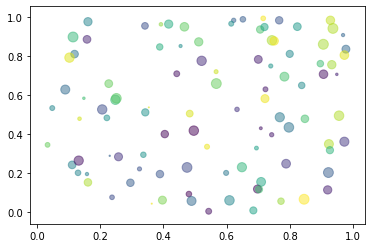

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

N = 100
xs = np.random.rand(N)
ys = np.random.rand(N)
cols = np.random.rand(N)
sizes = 100.0 * np.random.rand(N)

plt.scatter(xs, ys, s=sizes, c=cols, alpha=0.5)
plt.show()

## 3D plot

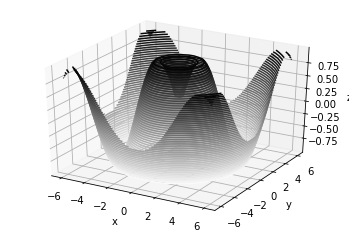

In [3]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


## Histogram

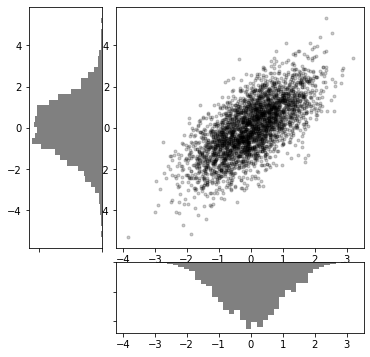

In [4]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

# Case 2: Fitting function to the data

In [5]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]


## Linear fit

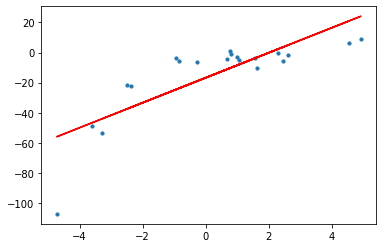

In [6]:
model = LinearRegression()
x1 = x 
y1 = y
model.fit(x1, y1)
y_pred = model.predict(x1)

plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

## Polynomial fit

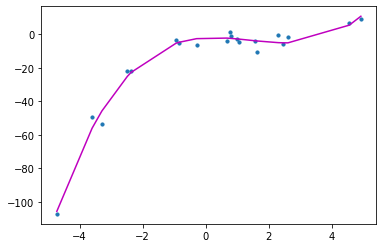

In [7]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

# Case 3: Adavnced fitting

<h2>Definition of the fitting model</h2>

Here we define a simple lorentzian function

In [8]:
def lorentzian(xx, scale=1.0, center=1.0, hwhm=3.0):
    if hwhm == 0:
        raise ValueError('hwhm of the lorentzian is equal to zero.')
    return scale * hwhm / ((xx-center)**2 + hwhm**2) / np.pi

<h2>Plot of the fitting model</h2>

The widget below shows how the variations of the lorentzian's parameters, *Scale*, *Center* and *FWHM*,  influence its shape.

In [9]:
# import python modules for plotting, fitting
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# for interactive plot
import ipywidgets

xx = np.linspace(-10,10,100)

def interactive_plot(scale, center, hwhm):
    plt.plot(xx, lorentzian(xx, float(scale), float(center), float(hwhm)))
    plt.ylabel('lorentzian(x,{scale},{center},{hwhm})'.
               format(scale=scale, center=center, hwhm=hwhm))
    plt.xlabel('x')
    plt.grid()
    plt.show()

interactive_plot = ipywidgets.interactive(interactive_plot, 
                                          scale=(1, 10), 
                                          center=(0, 10), 
                                          hwhm=(1, 5))

def reset_values(b):
    """Reset the interactive plots to inital values."""
    interactive_plot.children[0].value = 5
    interactive_plot.children[1].value = 5
    interactive_plot.children[2].value = 3

reset_button = ipywidgets.Button(description = "Reset")
reset_button.on_click(reset_values)

output = interactive_plot.children[-1]
output.layout.height = '270px'
display(interactive_plot, reset_button)

interactive(children=(IntSlider(value=5, description='scale', max=10, min=1), IntSlider(value=5, description='…

Button(description='Reset', style=ButtonStyle())

<h2>Creating reference data</h2>

**Input:** the reference data for this simple example correspond to a Lorentzian with added noise.


The fit is performed using `scipy.optimize.curve_fit`. <br> The example is based on implementations from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

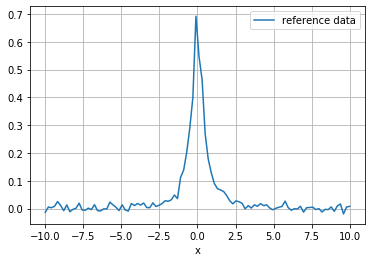

In [10]:
# Creation of reference data
lorentzian_noisy = lorentzian(xx, 0.89, -0.025, 0.45)*(1. + 0.1*np.random.normal(0,1,100)) + 0.01*np.random.normal(0,1,100)

plt.plot(xx, lorentzian_noisy, label='reference data')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

<h2>Setting and fitting</h2>

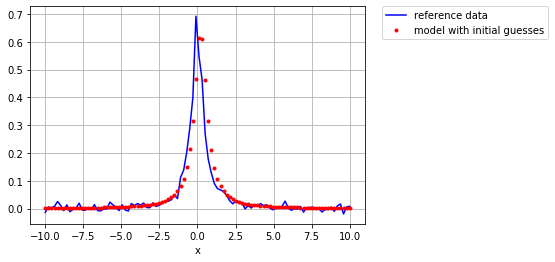

In [11]:
# From https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# perform fit with initial guesses scale=1, center=0.2 HWHM=0.5
initial_parameters_values = [1, 0.2, 0.5]

plt.plot(xx, lorentzian_noisy, 'b-', label='reference data')
plt.plot(xx, lorentzian(xx, *initial_parameters_values), 'r.', label='model with initial guesses')
plt.xlabel('x')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

popt, pcov = curve_fit(lorentzian, xx, lorentzian_noisy, p0=initial_parameters_values)

<h2>Plotting the results</h2>

In [12]:
# Calculation of the errors on the refined parameters:
perr = np.sqrt(np.diag(pcov))

print('Values of refined parameters:')
print('scale:', popt[0],'+/-', perr[0])
print('center :', popt[1],'+/-', perr[1])
print('HWHM', popt[2],'+/-', perr[2])

Values of refined parameters:
scale: 0.9049703537355824 +/- 0.016169539639952137
center : -0.012775899303848844 +/- 0.007944106404501985
HWHM 0.4452300262367235 +/- 0.011259325328874964


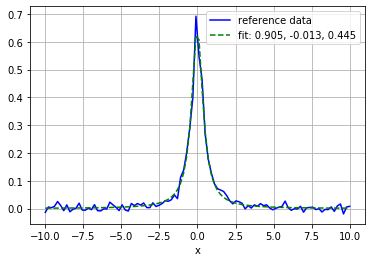

In [13]:
# Comparison of reference data with fitting result
plt.plot(xx, lorentzian_noisy, 'b-', label='reference data')
plt.plot(xx, lorentzian(xx, *popt), 'g--', label='fit: %5.3f, %5.3f, %5.3f' % tuple(popt))
plt.legend()
plt.xlabel('x')
plt.grid()
plt.show()

# Case 4: Clustering 

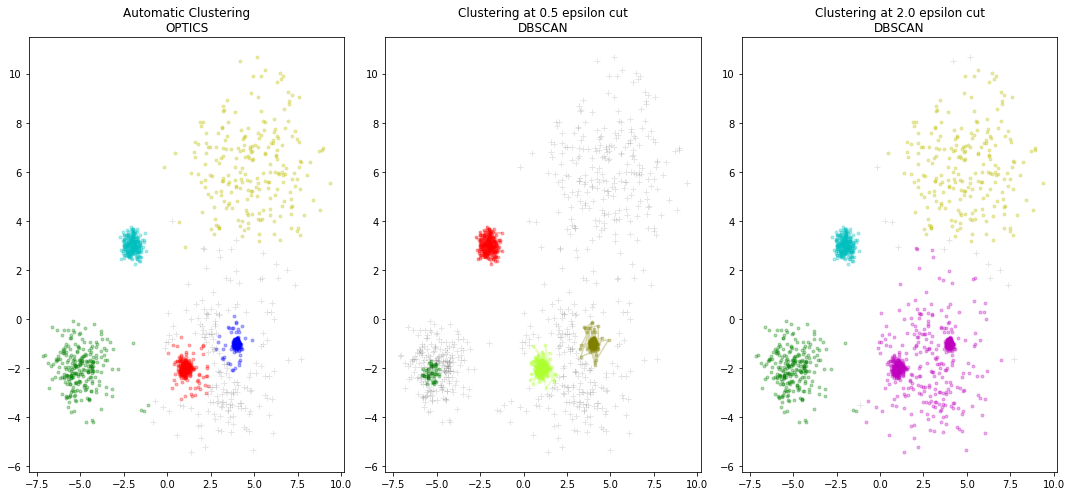

In [14]:
# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# License: BSD 3 clause


from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data

np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(15, 7))
G = gridspec.GridSpec(1, 3)
ax2 = plt.subplot(G[0, 0])
ax3 = plt.subplot(G[0, 1])
ax4 = plt.subplot(G[0, 2])

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()